In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split,  StratifiedKFold, cross_validate
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [35]:
df = pd.read_csv('Amazon_Credit_Approval.csv')

In [36]:
df.head()

,User_ID,Payment_Months_on_Time,Credit_Utilization_Ratio,Age_of_Oldest_Account_Years,Credit_Score,Approval
0,1,10,55,1,626,0
1,2,12,60,5,650,0
2,3,0,85,2,600,0
3,4,24,30,8,710,1
4,5,6,75,3,630,0


In [37]:
df = df.drop(columns='User_ID')

In [38]:
df.dtypes

Payment_Months_on_Time         int64
Credit_Utilization_Ratio       int64
Age_of_Oldest_Account_Years    int64
Credit_Score                   int64
Approval                       int64
dtype: object

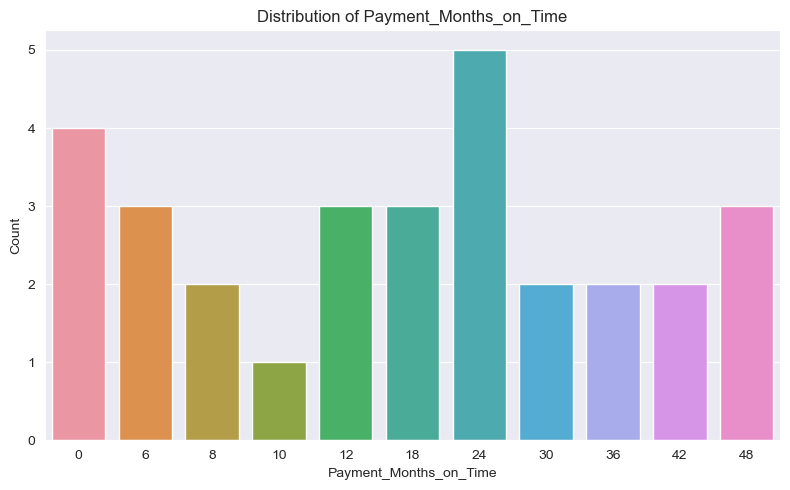

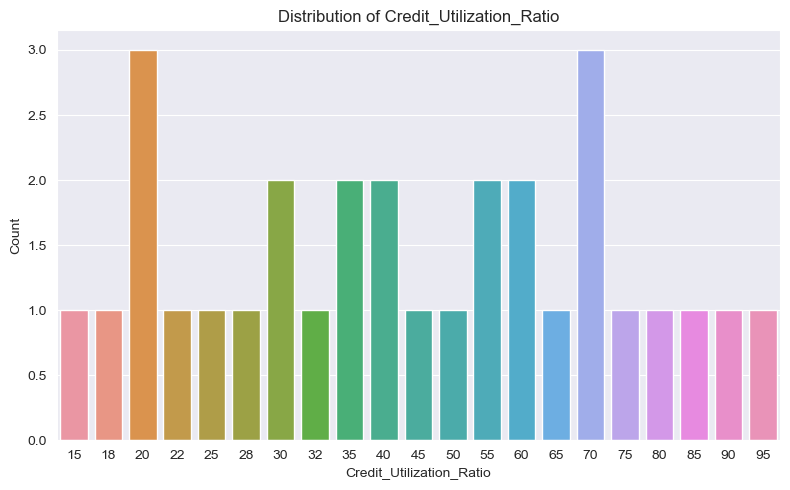

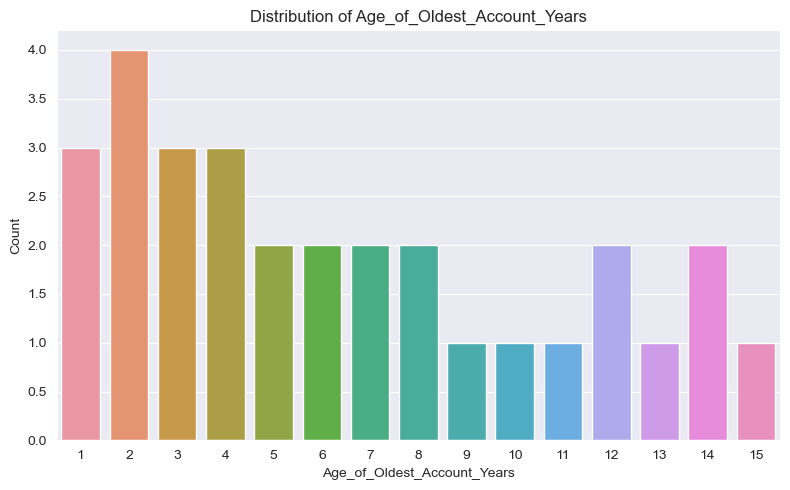

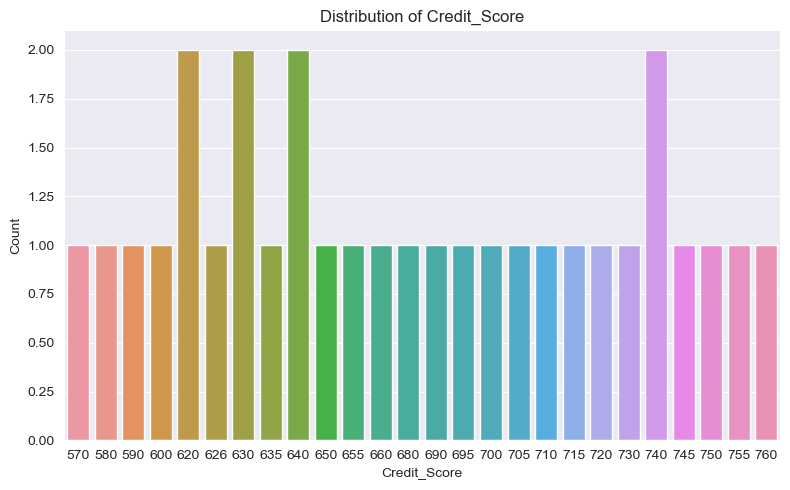

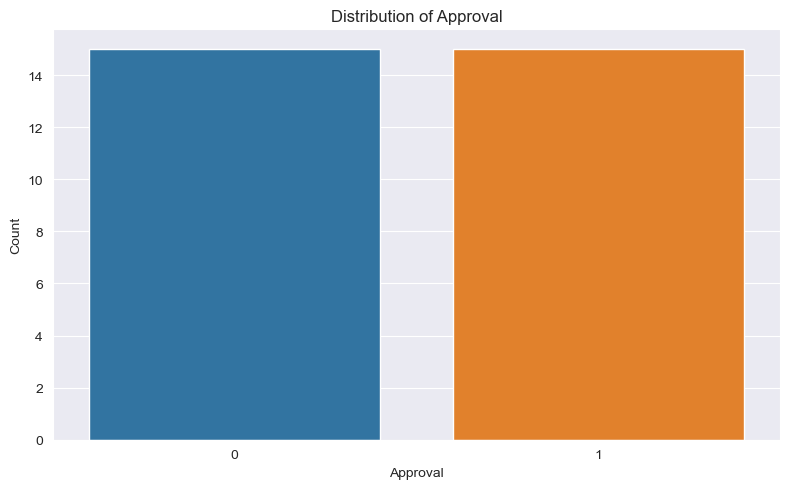

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in df.columns:
    if df[col].dtype != 'object':  # Check if feature is numeric
        sns.set_style('darkgrid')  # Optional: Choose a Seaborn style
        plt.figure(figsize=(8, 5))

        # Bar plot creation
        sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts().values)

        plt.xlabel(col)
        plt.ylabel('Count')
        plt.title(f'Distribution of {col}')
        plt.tight_layout()
        plt.show()




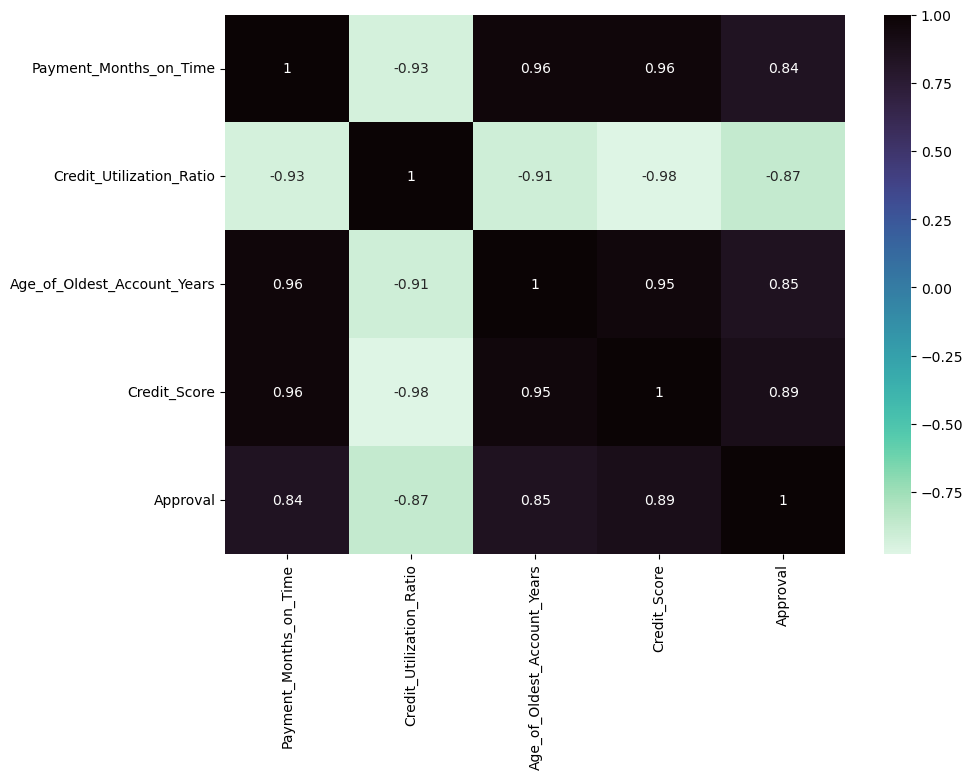

In [49]:
corr = df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, cmap='mako_r',annot=True)
plt.show()

In [40]:
features = ['Payment_Months_on_Time','Credit_Utilization_Ratio','Age_of_Oldest_Account_Years','Credit_Score']
X = df[features]
y = df['Approval']

In [41]:
y.value_counts()

Approval
0    15
1    15
Name: count, dtype: int64

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42) #split the  data into traing and validating

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #create an instance of standard scaler
scaler.fit(X_train) # fit it to the training data

X_train = scaler.transform(X_train) #transform training data
X_test = scaler.transform(X_test) #transform validation data
model = LogisticRegression() #create logistic regression instance
model.fit(X_train, y_train)

LogisticRegression()

Classification Report:
              precision    recall  f1-score   support

     Decline       1.00      0.80      0.89         5
    Approval       0.50      1.00      0.67         1

    accuracy                           0.83         6
   macro avg       0.75      0.90      0.78         6
weighted avg       0.92      0.83      0.85         6



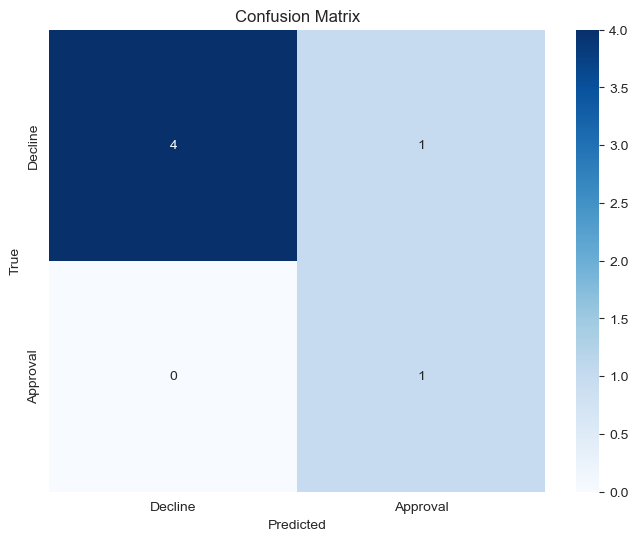

In [69]:
predictions = model.predict(X_test) # calculate predictions
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

print("Classification Report:")
print(classification_report(y_test, predictions, target_names=['Decline', 'Approval']))

# Plot confusion matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Decline', 'Approval'], yticklabels=['Decline', 'Approval'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()